## ⛄︎데이터분석기초 기획보고서⛄︎
<p style='color:yellow'> 데이터분석기초 DASF006_I1 33조 김지헌, 강채은, 조다현, 최어진 </p>
<hr>

- 선정한 데이터셋:
<b>한국산업단지공단_전국산업단지현황통계

- 선정 이유:
    - 하이
    - 하이

    
- 하이
    - hi
    - hi

### 1. 자료 파악 및 방향성 분석
##### - EDA, 전처리 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
sns.set(font="NanumGothic")

In [83]:
#데이터셋 import
df1 = pd.read_csv('/Users/ben8169/Library/Mobile Documents/com~apple~CloudDocs/2023_1학기/데이터분석기초/팀프로젝트/\
초기 제출양식/한국산업단지공단_전국산업단지현황통계/한국산업단지공단_전국산업단지현황통계_일반_20221231.csv', encoding='cp949')
df2 = pd.read_csv('/Users/ben8169/Library/Mobile Documents/com~apple~CloudDocs/2023_1학기/데이터분석기초/팀프로젝트/\
초기 제출양식/한국산업단지공단_전국산업단지현황통계/한국산업단지공단_전국산업단지현황통계_농공_20221231.csv', encoding='cp949')

df1.head(), df2.head()

(   유형  시도   시군    단지명 조성상태  지정면적(천제곱미터)  관리면적(천제곱미터)  산업시설구역_전체면적(천제곱미터)  \
 0  일반  서울  구로구   서울온수   완료          158          158                 123   
 1  일반  서울  강서구     마곡  조성중         1124         1124                 729   
 2  일반  서울  강동구     강동  미개발           78           78                  27   
 3  일반  부산  강서구   부산과학   완료         1967         1967                1030   
 4  일반  부산  강서구   부산과학   완료         1669         1669                 732   
 
    산업시설구역_분양대상(천제곱미터)  산업시설구역_분양(천제곱미터)  산업시설구역_미분양(천제곱미터)  산업시설구역_분양률(퍼센트)  \
 0                 123               123                  0           100.00   
 1                 729               603                126            82.72   
 2                   0                 0                  0             0.00   
 3                1030              1010                 20            98.06   
 4                 732               732                  0           100.00   
 
    입주업체(개)  가동업체(개)  고용현황(명)_남  고용현황(명)_여  고용현황(명)_계 

In [84]:
#df1,df2의 column 명 확인 / 일치하는지 확인
print(df1.columns, df2.columns)
df1.columns == df2.columns

Index(['유형', '시도', '시군', '단지명', '조성상태', '지정면적(천제곱미터)', '관리면적(천제곱미터)',
       '산업시설구역_전체면적(천제곱미터)', '산업시설구역_분양대상(천제곱미터)', '산업시설구역_분양(천제곱미터)',
       '산업시설구역_미분양(천제곱미터)', '산업시설구역_분양률(퍼센트)', '입주업체(개)', '가동업체(개)',
       '고용현황(명)_남', '고용현황(명)_여', '고용현황(명)_계', '누계생산(백만원)', '누계수출(천달러)'],
      dtype='object') Index(['유형', '시도', '시군', '단지명', '조성상태', '지정면적(천제곱미터)', '관리면적(천제곱미터)',
       '산업시설구역_전체면적(천제곱미터)', '산업시설구역_분양대상(천제곱미터)', '산업시설구역_분양(천제곱미터)',
       '산업시설구역_미분양(천제곱미터)', '산업시설구역_분양률(퍼센트)', '입주업체(개)', '가동업체(개)',
       '고용현황(명)_남', '고용현황(명)_여', '고용현황(명)_계', '누계생산(백만원)', '누계수출(천달러)'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [85]:
#df1,df2에서 음수 값 결측치 존재하는지 확인 
df1_1 = df1.iloc[:,5:]
has_negative = (df1_1 < 0).any().any()
if has_negative:
    print('has negative')
else:
    print('no negative')
    
df2_1 = df2.iloc[:,5:]
has_negative = (df2_1 < 0).any().any()
if has_negative:
    print('has negative')
else:
    print('no negative')

no negative
no negative


In [86]:
#자료에 Nan 값이 있는지 확인 ... Nan 값은 0.0 으로 대체
df1.isnull().sum(), df2.isnull().sum()
df1 = df1.fillna(0)
df2 = df2.fillna(0)

df1

,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),산업시설구역_전체면적(천제곱미터),산업시설구역_분양대상(천제곱미터),산업시설구역_분양(천제곱미터),산업시설구역_미분양(천제곱미터),산업시설구역_분양률(퍼센트),입주업체(개),가동업체(개),고용현황(명)_남,고용현황(명)_여,고용현황(명)_계,누계생산(백만원),누계수출(천달러)
0,일반,서울,구로구,서울온수,완료,158,158,123,123,123,0,100.00,212,212,1206.0,401.0,1607.0,120000.0,8000.0
1,일반,서울,강서구,마곡,조성중,1124,1124,729,729,603,126,82.72,200,131,25872.0,13001.0,38873.0,0.0,0.0
2,일반,서울,강동구,강동,미개발,78,78,27,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
3,일반,부산,강서구,부산과학,완료,1967,1967,1030,1030,1010,20,98.06,228,226,3902.0,959.0,4861.0,2609587.0,620201.0
4,일반,부산,강서구,부산과학,완료,1669,1669,732,732,732,0,100.00,217,215,3160.0,879.0,4039.0,1939867.0,447113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,일반,경남,의령군,부림,조성중,352,351,184,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
752,일반,경남,김해시,하계,미개발,262,261,190,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
753,일반,경남,사천시,사천서부,미개발,314,313,183,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
754,일반,경남,거창군,거창첨단,미개발,304,304,192,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0


In [87]:
pd.set_option('display.max_columns', None)
df2

,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),산업시설구역_전체면적(천제곱미터),산업시설구역_분양대상(천제곱미터),산업시설구역_분양(천제곱미터),산업시설구역_미분양(천제곱미터),산업시설구역_분양률(퍼센트),입주업체(개),가동업체(개),고용현황(명)_남,고용현황(명)_여,고용현황(명)_계,누계생산(백만원),누계수출(천달러)
0,농공,부산,기장군,정관,완료,258,258,189,189,189,0,100.0,33,33,1448.0,386.0,1834.0,624435.0,75190.0
1,농공,대구,달성군,구지,완료,193,193,160,160,160,0,100.0,20,20,496.0,75.0,571.0,259890.0,8551.0
2,농공,대구,달성군,옥포,완료,162,162,130,130,130,0,100.0,46,46,326.0,191.0,517.0,102789.0,22734.0
3,농공,광주,광산구,소촌,완료,324,324,262,262,262,0,100.0,64,64,1186.0,416.0,1602.0,609941.0,142254.0
4,농공,울산,북구,달천,완료,260,260,194,194,194,0,100.0,120,99,911.0,413.0,1324.0,409448.0,11704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,농공,경남,함양군,함양중방전문,완료,99,99,61,61,61,0,100.0,6,2,0.0,0.0,0.0,0.0,0.0
472,농공,경남,함양군,인산죽염항노화,조성중,210,206,89,0,0,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0
473,농공,제주,서귀포시,대정,완료,115,115,94,94,94,0,100.0,22,20,160.0,34.0,194.0,88135.0,336.0
474,농공,제주,제주시,구좌,완료,67,67,49,49,49,0,100.0,17,17,102.0,52.0,154.0,45574.0,109.0


/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/4182451640.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/4182451640.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Vers

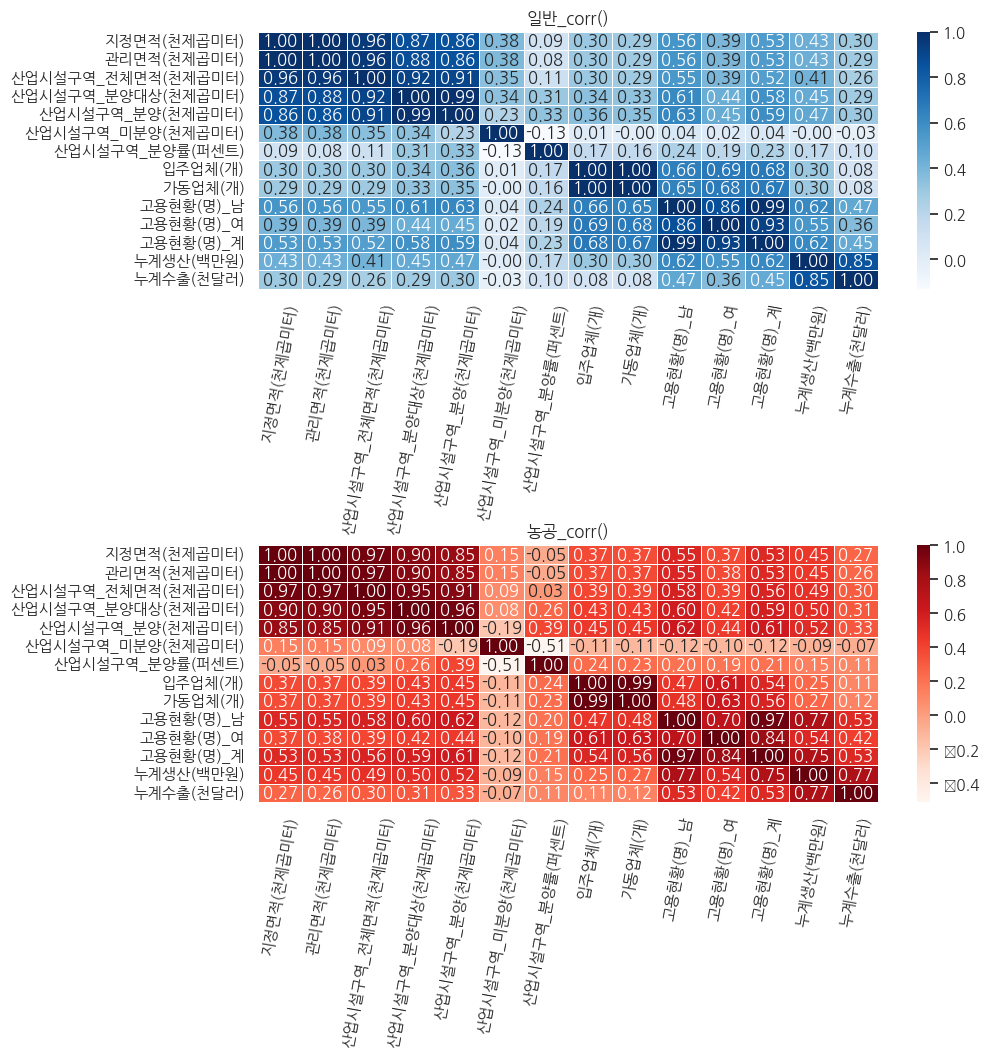

In [88]:
#df1.corr()를 sns.heatmap으로 시각화
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.heatmap(data = df1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.xticks(rotation=80)
plt.title('일반_corr()')

#df2.corr()를 sns.heatmap으로 시각화
plt.subplot(2,1,2)
sns.heatmap(data = df2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
plt.title('농공_corr()')
plt.xticks(rotation=80)

plt.subplots_adjust(hspace=1)
plt.show()

In [89]:
#지정면적으로 그룹화
#두 column의 값을 평균내어 새로운 column 생성 ---> 거의 차이 없다 
df1_area = df1[['지정면적(천제곱미터)', '관리면적(천제곱미터)']]
df1_area['평균면적'] = df1_area.mean(axis=1)

df2_area = df2[['지정면적(천제곱미터)', '관리면적(천제곱미터)']]
df2_area['평균면적'] = df2_area.mean(axis=1)
df1_area.describe(), df2_area.describe()

/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/2038221512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_area['평균면적'] = df1_area.mean(axis=1)
/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/2038221512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_area['평균면적'] = df2_area.mean(axis=1)


(       지정면적(천제곱미터)  관리면적(천제곱미터)         평균면적
 count   756.000000   756.000000   756.000000
 mean    828.894180   815.353175   822.123677
 std    1154.511129  1134.704599  1143.376693
 min      34.000000    34.000000    34.000000
 25%     149.000000   149.000000   149.000000
 50%     439.500000   437.000000   438.000000
 75%     984.000000   974.750000   982.625000
 max    9450.000000  9431.000000  9440.500000,
        지정면적(천제곱미터)  관리면적(천제곱미터)        평균면적
 count   476.000000   476.000000  476.000000
 mean    162.951681   161.890756  162.421218
 std      91.500749    91.521045   91.479492
 min      30.000000    30.000000   30.000000
 25%     105.000000   103.750000  104.750000
 50%     143.500000   142.500000  143.000000
 75%     195.250000   194.250000  195.125000
 max     777.000000   775.000000  776.000000)

(0.0, 8000.0)

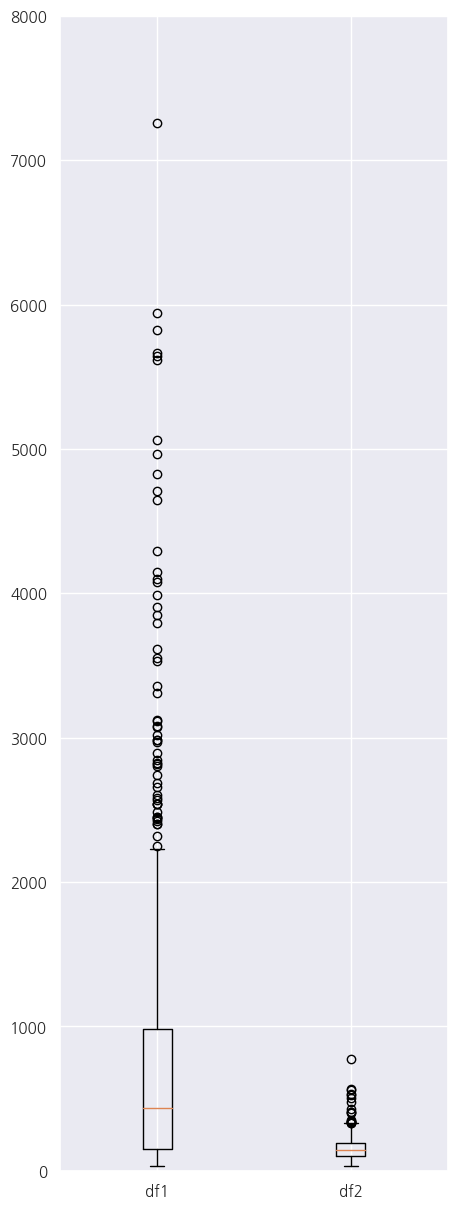

In [90]:
#df1_area와 df2_area를 통한 boxplot 비교
plt.figure(figsize=(5,15))
plt.boxplot([df1_area['평균면적'], df2_area['평균면적']], labels=['df1', 'df2'])
plt.ylim(0,8000)

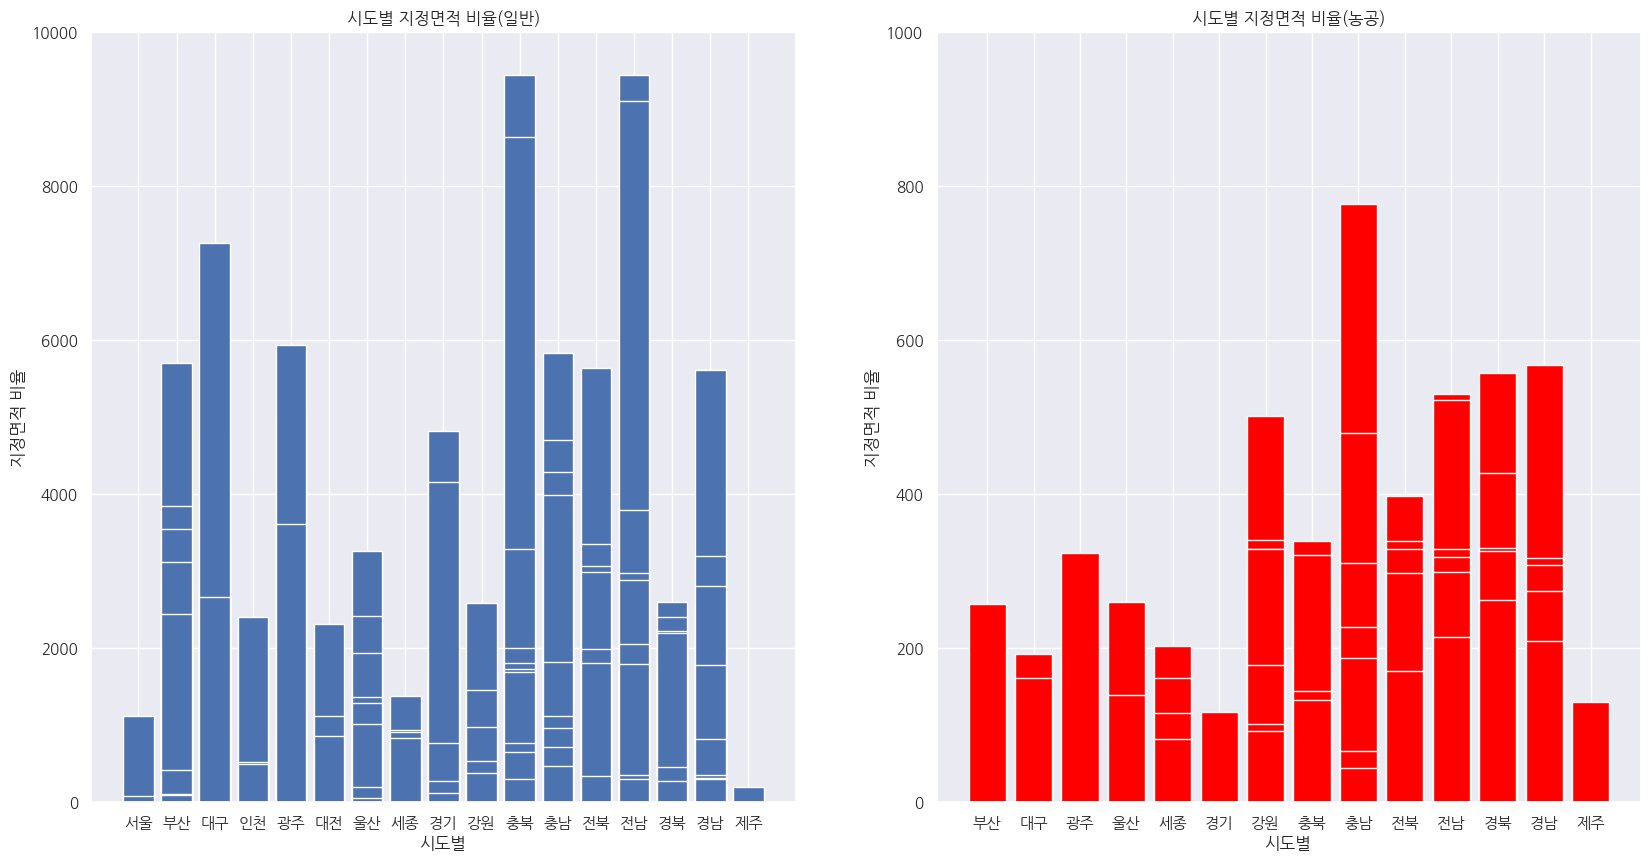

In [91]:
#시도별 지정면적 비율 -> 농공 대비 일반에서 y축 scale 10배이상 차이남
#농공 지정면적이 일반 지정면적에 비해 매우 작음
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.bar(df1['시도'], df1['지정면적(천제곱미터)'])
plt.title('시도별 지정면적 비율(일반)')
plt.xlabel('시도별')
plt.ylabel('지정면적 비율')
plt.ylim(0,10000)

plt.subplot(1,2,2)
plt.bar(df2['시도'], df2['지정면적(천제곱미터)'], color='red')
plt.title('시도별 지정면적 비율(농공)')
plt.xlabel('시도별')
plt.ylabel('지정면적 비율')
plt.ylim(0,1000)
plt.show()


<BarContainer object of 14 artists>

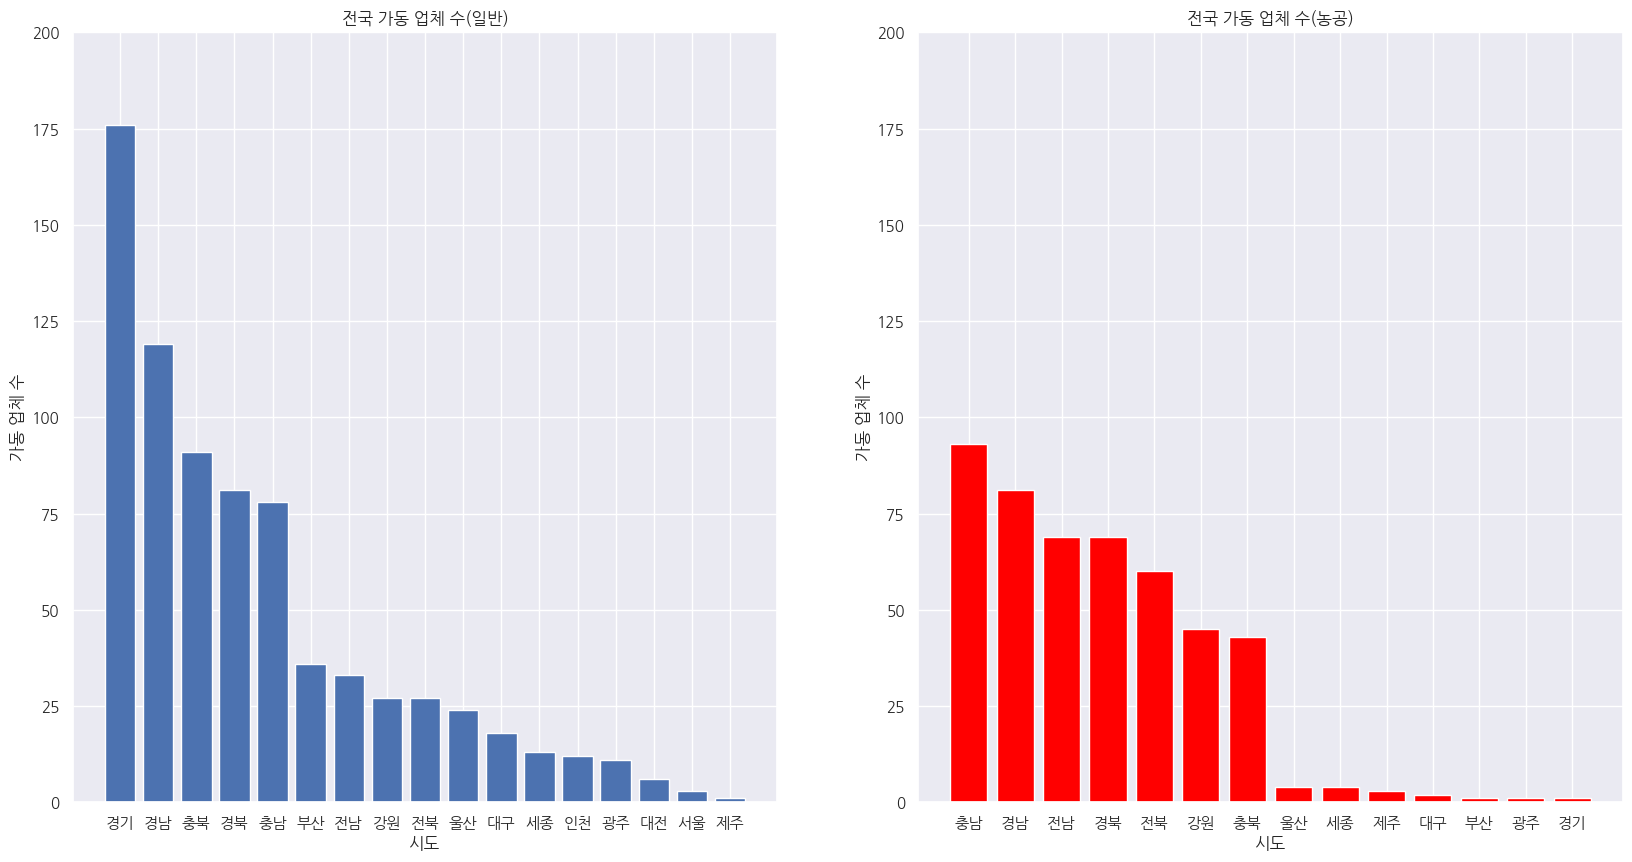

In [92]:
#시도별 가동 업체 수 그래프 비교 > 농공 업체 수는 면적 대비 많은 편
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('전국 가동 업체 수(일반)')
plt.xlabel('시도')
plt.ylabel('가동 업체 수')
plt.ylim(0, 200)

plt.bar(df1['시도'].value_counts().index, df1['시도'].value_counts())
plt.subplot(1,2,2)
plt.title('전국 가동 업체 수(농공)')
plt.xlabel('시도')
plt.ylabel('가동 업체 수')
plt.ylim(0, 200)
plt.bar(df2['시도'].value_counts().index, df2['시도'].value_counts(),color='red')




<Axes: title={'center': '농공'}>

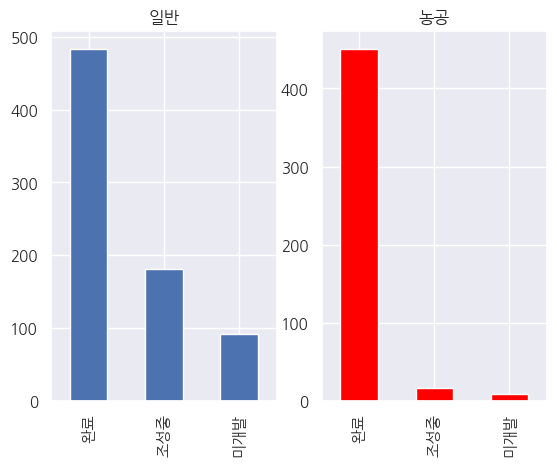

In [93]:
#조성상태별로 그래프 그리기 > 농공 단지 활성상태도 좋음 

plt.subplot(1,2,1)
plt.title('일반')
df1['조성상태'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title('농공')
df2['조성상태'].value_counts().plot(kind='bar', color='red')



In [94]:
#일반과 농공에서 조성상태별로 시군구 확인
df1_1 = df1[df1['조성상태'].isin(['조성중'])]
print(f"일반-조성중 {'='*50}\n{df1_1['시군'].unique()}")
df1_1 = df1[df1['조성상태'].isin(['미개발'])]
print(f"일반-미개발 {'='*50}\n{df1_1['시군'].unique()}")

df2_1 = df2[df2['조성상태'].isin(['조성중'])]
print(f"농공-조성중 {'='*50}\n{df2_1['시군'].unique()}")
df2_1 = df2[df2['조성상태'].isin(['미개발'])]
print(f"농공-미개발 {'='*50}\n{df2_1['시군'].unique()}")

일반-조성중 ==================================================
['강서구' '사하구' '기장군' '달성군' '북구' '서구' '중구' '남구' '울주군' '세종' '화성시' '김포시' '평택시'
 '시흥시' '용인시' '용인시 처인구' '파주시' '이천시' '안산시' '안성시' '양주시' '포천시' '연천군' '오산시'
 '삼척시' '춘천시' '동해시' '강릉시' '원주시' '철원군' '청주시' '영동군' '음성군' '괴산군' '진천군' '제천시'
 '충주시' '보령시' '당진시' '서산시' '아산시' '천안시' '공주시' '고창군' '완주군' '남원시' '광양시' '순천시'
 '여수시' '진도군' '장흥군' '해남군' '무안군' '경주시' '포항시' '고령군' '영천시' '김천시' '경산시' '상주시'
 '김해시' '사천시' '진주시' '통영시' '고성군' '창녕군' '하동군' '양산시' '창원시 마산합포구' '거제시' '의령군'
 '함안군']
일반-미개발 ==================================================
['강동구' '강서구' '북구' '서구' '울주군' '세종' '파주시' '평택시' '양주시' '포천시' '안성시' '시흥시'
 '김포시' '용인시' '이천시' '용인시 처인구' '청주시' '충주시' '진천군' '음성군' '예산군' '공주시' '서산시'
 '천안시' '아산시' '부여군' '김제시' '여수시' '영암군' '화순군' '경산시' '봉화군' '경주시' '포항시' '안동시'
 '고령군' '영천시' '통영시' '의령군' '거제시' '창원시' '사천시' '함안군' '김해시' '밀양시' '창원시 진해구'
 '창녕군' '창원시 마산회원구' '거창군']
농공-조성중 ==================================================
['철원군' '홍천군' '홍성군' '김제시' '정읍시' '완주군' '임실군' '영광군' '함평군' '여수시' '고흥군' '순천

In [95]:
# df2[df2['조성상태'] == '조성중']
df2[df2['조성상태'] == '미개발']

,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),산업시설구역_전체면적(천제곱미터),산업시설구역_분양대상(천제곱미터),산업시설구역_분양(천제곱미터),산업시설구역_미분양(천제곱미터),산업시설구역_분양률(퍼센트),입주업체(개),가동업체(개),고용현황(명)_남,고용현황(명)_여,고용현황(명)_계,누계생산(백만원),누계수출(천달러)
100,농공,충북,증평군,도안2,미개발,133,133,101,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
185,농공,충남,논산시,가야곡2,미개발,311,311,221,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
191,농공,충남,청양군,정산2,미개발,187,187,124,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
193,농공,충남,공주시,제이팜스,미개발,45,45,30,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
298,농공,전남,나주시,남평,미개발,112,112,69,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
315,농공,전남,고흥군,대서,미개발,150,150,90,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
319,농공,전남,곡성군,운곡특화,미개발,183,183,107,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
322,농공,전남,영광군,묘량,미개발,214,214,123,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
391,농공,경북,구미시,고아제2,미개발,263,263,165,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


30


<BarContainer object of 27 artists>

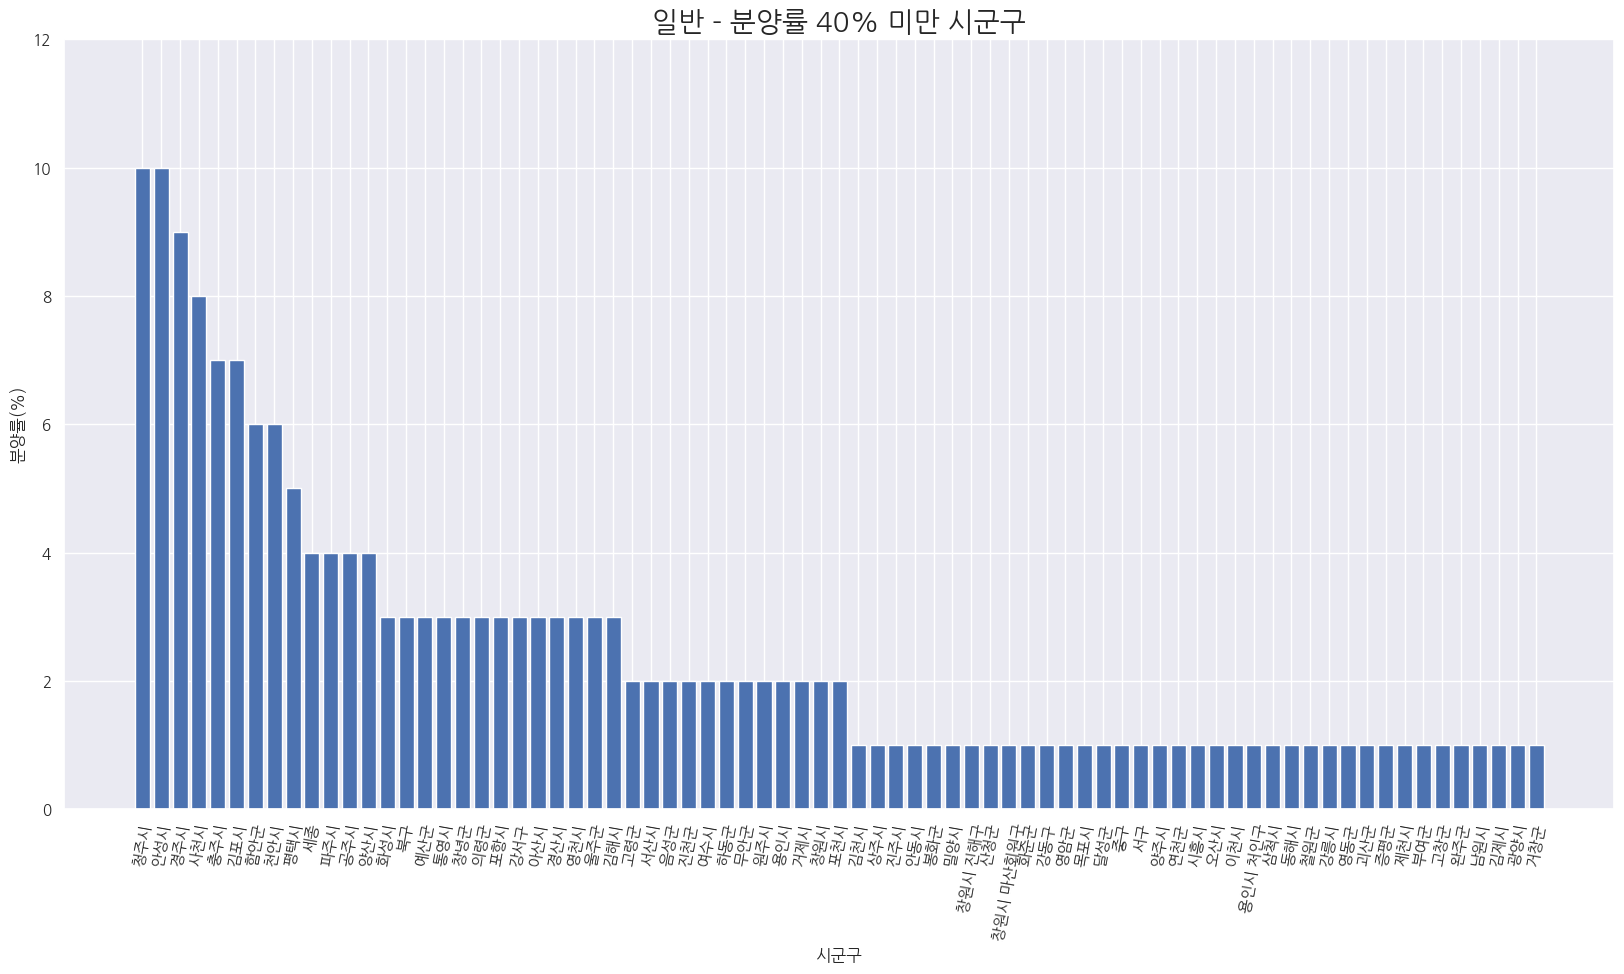

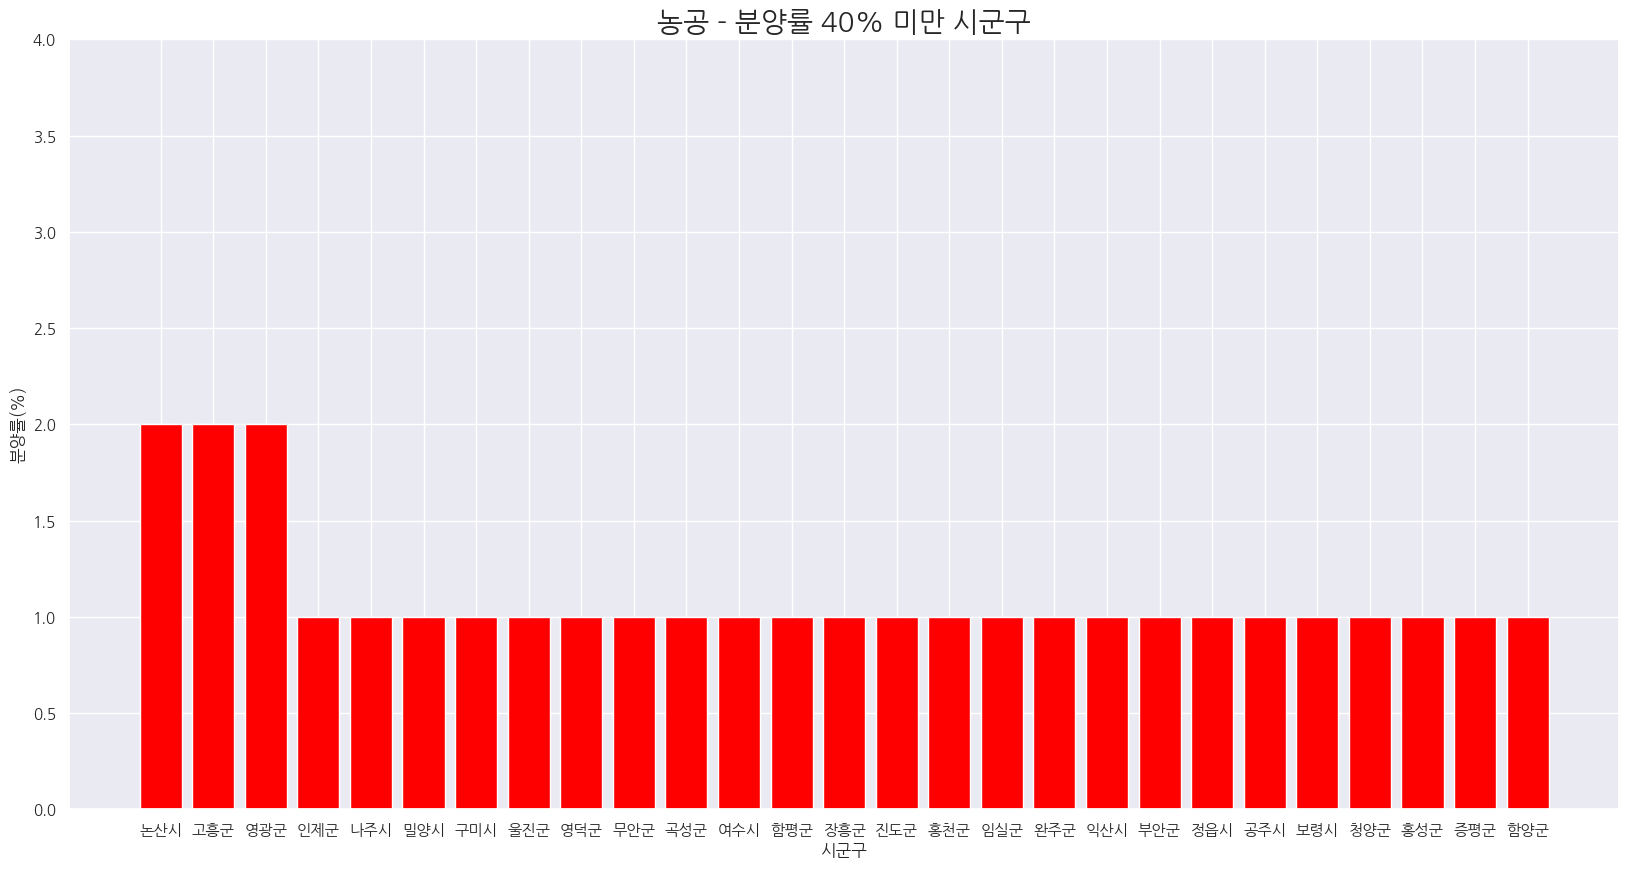

In [96]:
#미분양, 조성중 row의 분양률 파악
df1_1 = df1[df1['산업시설구역_분양률(퍼센트)'] < 40.0]
df2_1 = df2[df2['산업시설구역_분양률(퍼센트)'] < 40.0]
print(len(df2_1))


#df의 분양률이 40% 미만인 row의 시군구 확인 후 시군구별로 그래프 그리기
plt.figure(figsize=(20,10))
plt.title('일반 - 분양률 40% 미만 시군구',fontsize=20)
plt.xlabel('시군구')
plt.ylabel('분양률(%)')
plt.ylim(0, 12)
plt.xticks(rotation=80) #bar 간의 간격 조정
#bar 간의 간격 조정

plt.bar(df1_1['시군'].value_counts().index, df1_1['시군'].value_counts())

plt.figure(figsize=(20,10))
plt.title('농공 - 분양률 40% 미만 시군구',fontsize=20)
plt.xlabel('시군구')
plt.ylabel('분양률(%)')
plt.ylim(0, 4)
plt.bar(df2_1['시군'].value_counts().index, df2_1['시군'].value_counts(), color='red')


([<matplotlib.patches.Wedge at 0x15b1929d0>,
 [Text(-0.998673519235534, 0.46114119527289443, '일반'),
  Text(0.9986735192355337, -0.46114119527289504, '농공')],
 [Text(-0.5447310104921094, 0.2515315610579424, '86.2%'),
  Text(0.5447310104921093, -0.2515315610579427, '13.8%')])

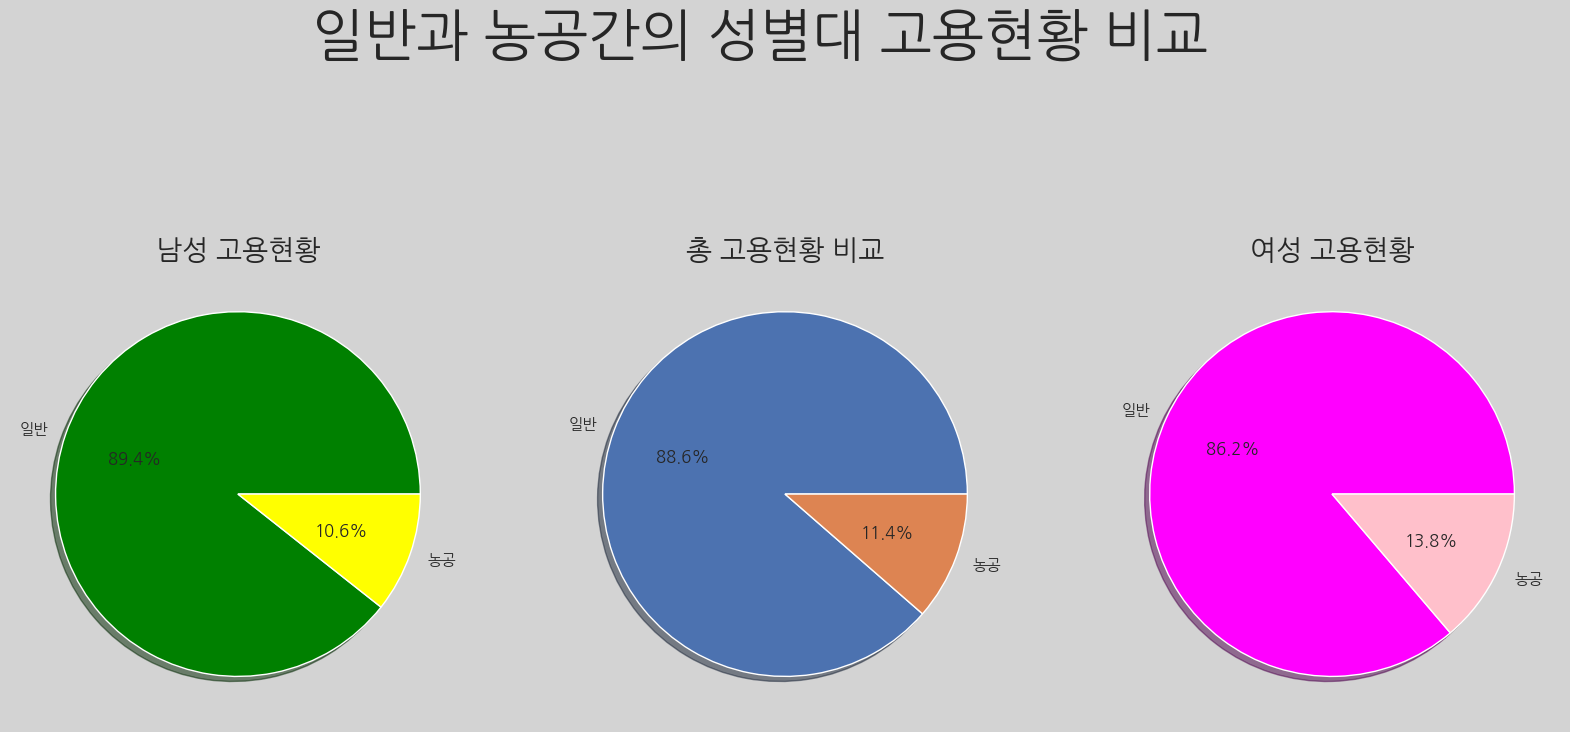

In [97]:
#고용인원 수 파이그래프로 비교
total_people = [df1['고용현황(명)_계'].sum(),df2['고용현황(명)_계'].sum()]
total_men =  [df1['고용현황(명)_남'].sum(),df2['고용현황(명)_남'].sum()]
total_women =  [df1['고용현황(명)_여'].sum(),df2['고용현황(명)_여'].sum()]

plt.figure(figsize=(20,10), facecolor='lightgrey')
plt.suptitle("일반과 농공간의 성별대 고용현황 비교", fontsize=40)

plt.subplot(1,3,2)
plt.title('총 고용현황 비교',fontsize=20)
plt.pie(total_people, labels=['일반','농공'], autopct='%.1f%%', shadow=True)


plt.subplot(1,3,1)
plt.title('남성 고용현황',fontsize=20)
plt.pie(total_men, labels=['일반','농공'], autopct='%.1f%%', shadow=True, colors=['green','yellow'])

plt.subplot(1,3,3)
plt.title('여성 고용현황',fontsize=20)
plt.pie(total_women, labels=['일반','농공'], autopct='%.1f%%', shadow=True, colors=['magenta','pink'])

([<matplotlib.patches.Wedge at 0x15b2a4ad0>,
 [Text(-0.6641949973644508, 0.8768380725516185, '남성'),
  Text(0.6641949152689423, -0.8768381347380386, '여성')],
 [Text(-0.3622881803806095, 0.47827531230088277, '70.6%'),
  Text(0.36228813560124123, -0.4782753462207483, '29.4%')])

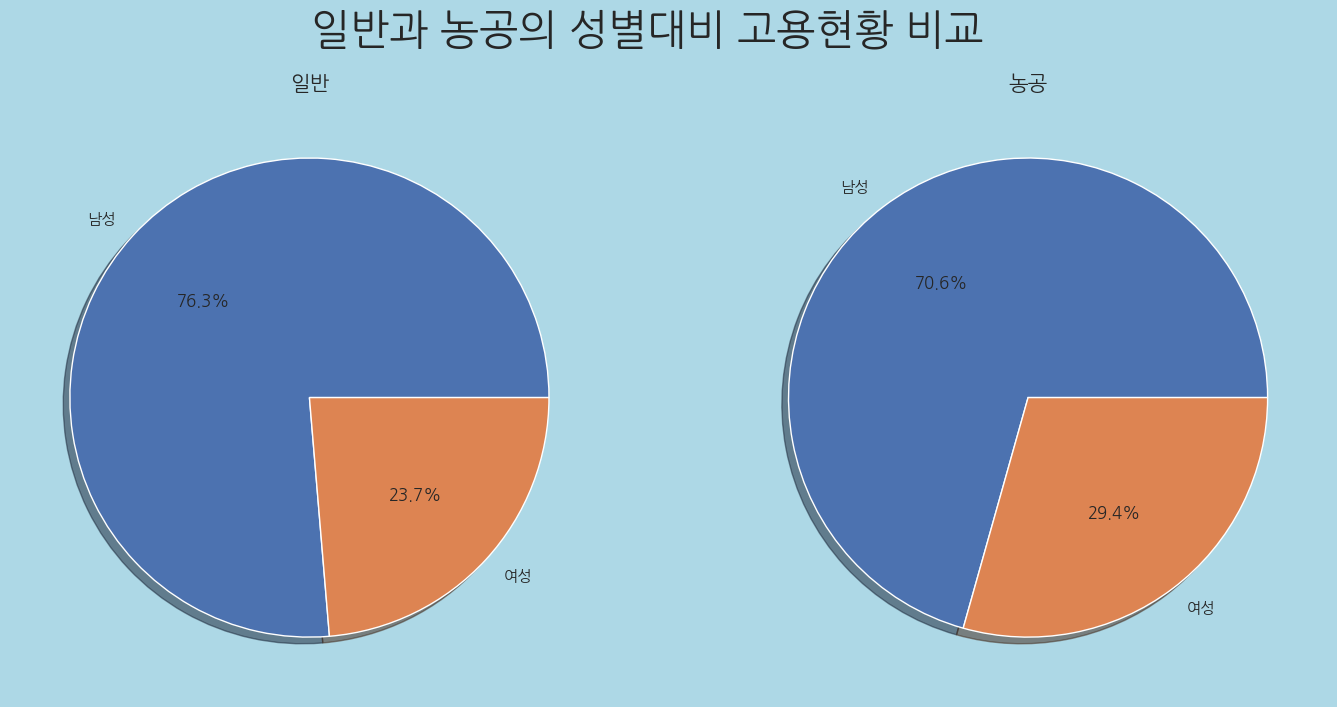

In [98]:
#일반과 농공에서 비교
plt.figure(figsize=(17,8), facecolor='lightblue')
plt.suptitle("일반과 농공의 성별대비 고용현황 비교", fontsize=30)

plt.subplot(1,2,1)
plt.title('일반',fontsize = 15)
plt.pie([total_men[0],total_women[0]], labels=['남성','여성'], autopct='%.1f%%', shadow=True)

plt.subplot(1,2,2)
plt.title('농공',fontsize = 15)
plt.pie([total_men[1],total_women[1]], labels=['남성','여성'], autopct='%.1f%%', shadow=True)

상관계수 = 일반:0.8463984732227746, 농공:0.7653629632225484


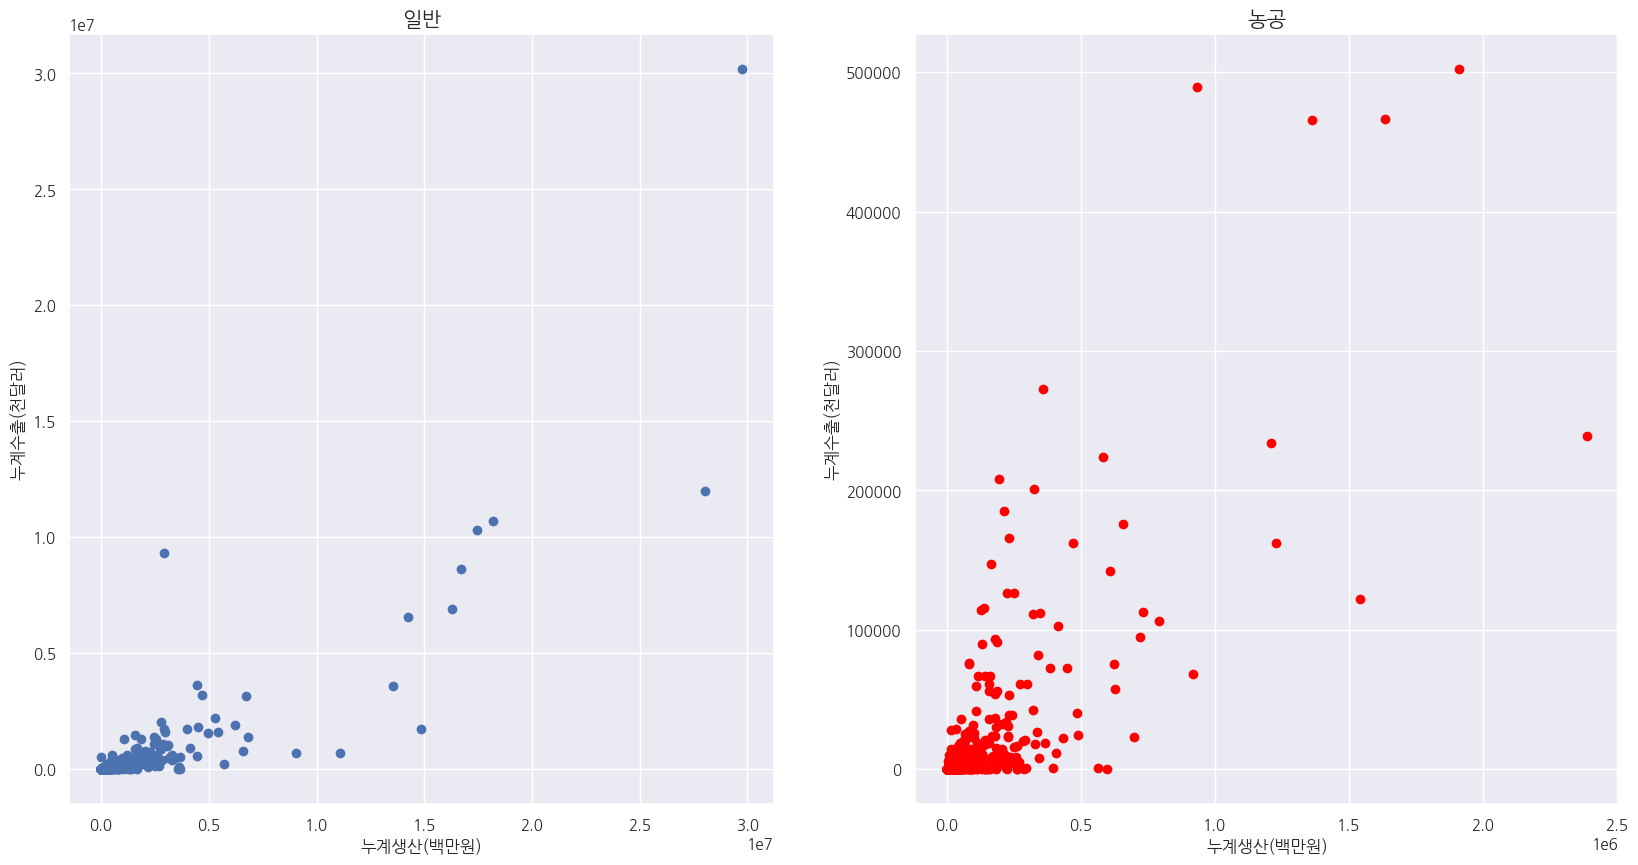

In [99]:
#누계생산 대비 누계수출 상관관계 분석   #특이점: 농공에서는 누계생산 대비 누계수출이 더 높음 
corr_coeff = df1['누계생산(백만원)'].corr(df1['누계수출(천달러)']), df2['누계생산(백만원)'].corr(df2['누계수출(천달러)'])
print("="*55)
print(f"상관계수 = 일반:{corr_coeff[0]}, 농공:{corr_coeff[1]}")
print("="*55)

#그래프로 표로
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('일반',fontsize = 15)
plt.xlabel('누계생산(백만원)')
plt.ylabel('누계수출(천달러)')
plt.scatter(df1['누계생산(백만원)'], df1['누계수출(천달러)'])


plt.subplot(1,2,2)
plt.title('농공',fontsize = 15)
plt.xlabel('누계생산(백만원)')
plt.ylabel('누계수출(천달러)')
plt.scatter(df2['누계생산(백만원)'], df2['누계수출(천달러)'], color='red')

상관계수 = 일반:0.617016533280261, 농공:0.7514841325958247


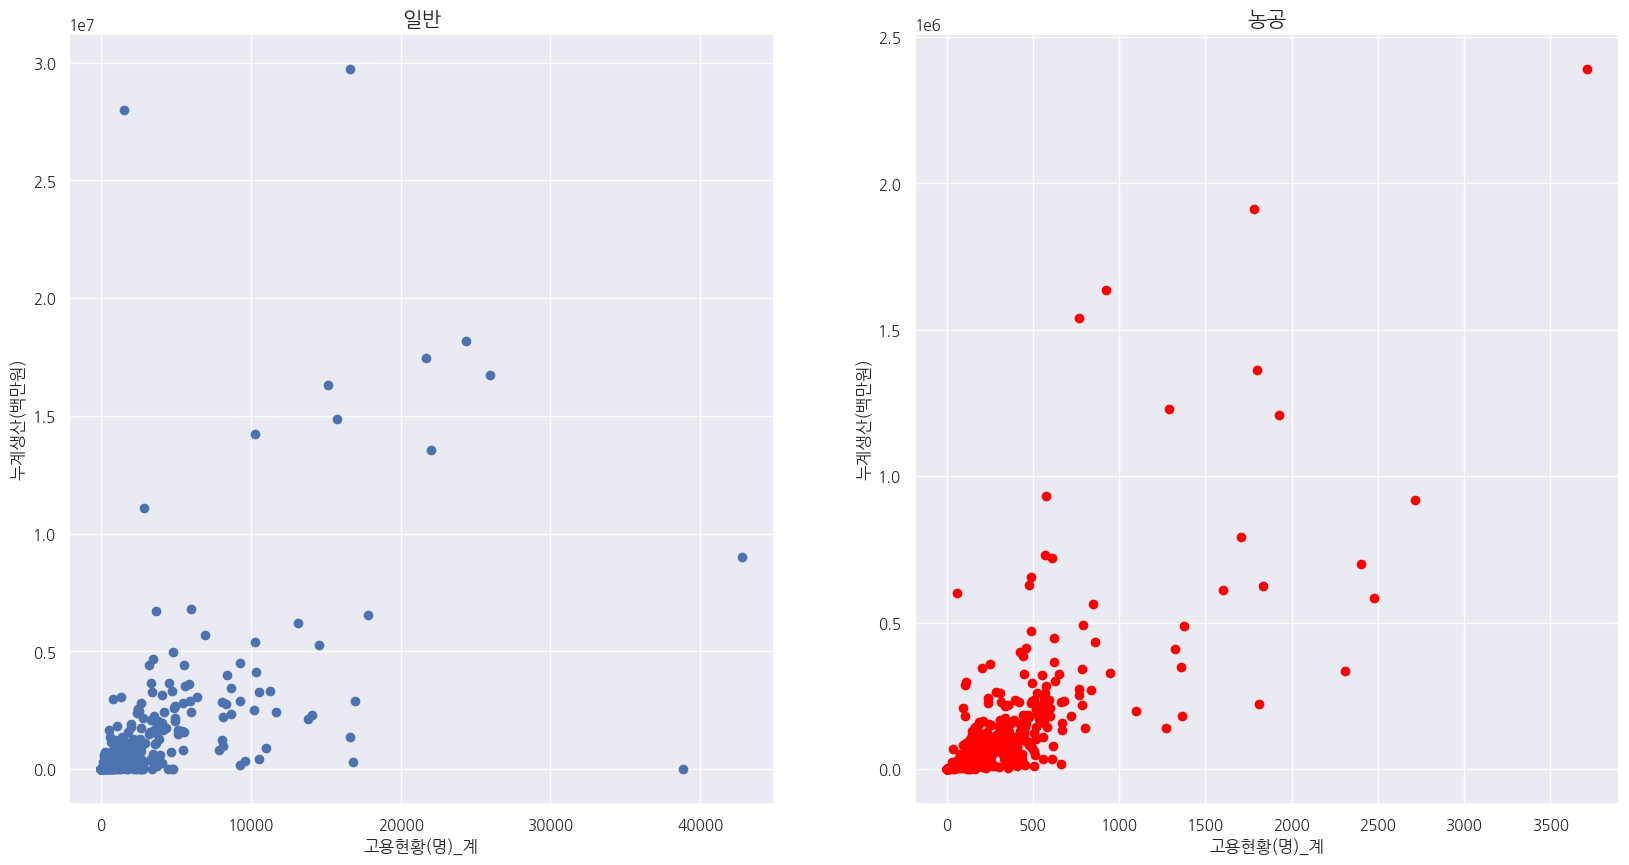

In [100]:
# 고용현황(명)_계, 누계생산(백만원) 간의 상관관계 분석
corr_coeff = df1['누계생산(백만원)'].corr(df1['고용현황(명)_계']), df2['누계생산(백만원)'].corr(df2['고용현황(명)_계'])
print("="*55)
print(f"상관계수 = 일반:{corr_coeff[0]}, 농공:{corr_coeff[1]}")
print("="*55)

#그래프로 표로
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('일반',fontsize = 15)
plt.xlabel('고용현황(명)_계')
plt.ylabel('누계생산(백만원)')
plt.scatter(df1['고용현황(명)_계'],df1['누계생산(백만원)'])



plt.subplot(1,2,2)
plt.title('농공',fontsize = 15)
plt.xlabel('고용현황(명)_계')
plt.ylabel('누계생산(백만원)')
plt.scatter(df2['고용현황(명)_계'],df2['누계생산(백만원)'], color='red')

In [101]:
#이상점 확인
lst1 = df1['누계생산(백만원)'] > 2.5 * 10 **7
print("<<<<일반 - 이상점>>>>")
print(df1[lst1])
print("="*100)

lst2 = df2['누계생산(백만원)'] > 1.5 * 10 **6
print("<<<<농공 - 이상점>>>>")
print(df2[lst2])

print(1.5 * 10 **6)

<<<<일반 - 이상점>>>>
     유형  시도   시군                   단지명 조성상태  지정면적(천제곱미터)  관리면적(천제곱미터)  \
424  일반  충남  서산시                    대산   완료         1103         1103   
456  일반  충남  아산시  아산디스플레이시티1(구 탕정컴플렉스)   완료         2451         2451   

     산업시설구역_전체면적(천제곱미터)  산업시설구역_분양대상(천제곱미터)  산업시설구역_분양(천제곱미터)  \
424                 863                 863               863   
456                1562                1562              1562   

     산업시설구역_미분양(천제곱미터)  산업시설구역_분양률(퍼센트)  입주업체(개)  가동업체(개)  고용현황(명)_남  \
424                  0            100.0        4        4     1440.0   
456                  0            100.0        6        6    12265.0   

     고용현황(명)_여  고용현황(명)_계   누계생산(백만원)   누계수출(천달러)  
424       55.0     1495.0  28005000.0  12005000.0  
456     4352.0    16617.0  29728691.0  30182209.0  
<<<<농공 - 이상점>>>>
     유형  시도   시군     단지명 조성상태  지정면적(천제곱미터)  관리면적(천제곱미터)  산업시설구역_전체면적(천제곱미터)  \
89   농공  충북  진천군  문백전기전자   완료          124          124                 111   
126  농공  충남  서산시   

상관계수 = 일반:0.4542007497184594, 농공:0.5308661150071368


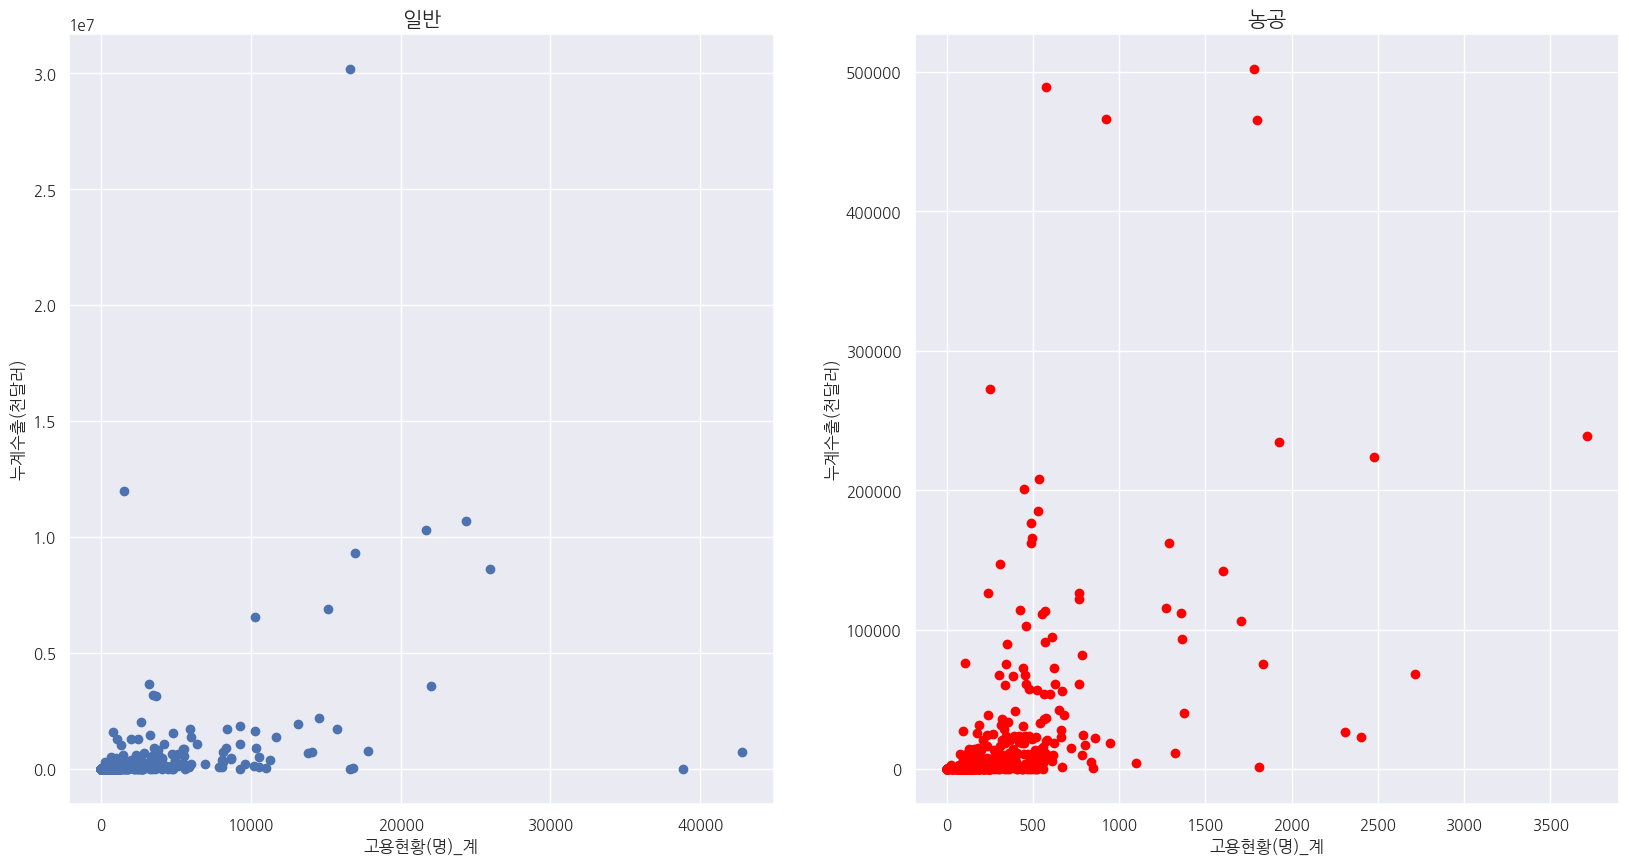

In [102]:
#고용현황(명)_계, 누계수(백만원) 간의 상관관계 분석
#그다지 높지 않은 상관관계 
corr_coeff = df1['고용현황(명)_계'].corr(df1['누계수출(천달러)']), df2['고용현황(명)_계'].corr(df2['누계수출(천달러)'])
print("="*55)
print(f"상관계수 = 일반:{corr_coeff[0]}, 농공:{corr_coeff[1]}")
print("="*55)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('일반',fontsize = 15)
plt.xlabel('고용현황(명)_계')
plt.ylabel('누계수출(천달러)')
plt.scatter(df1['고용현황(명)_계'],df1['누계수출(천달러)'])

plt.subplot(1,2,2)
plt.title('농공',fontsize = 15)
plt.xlabel('고용현황(명)_계')
plt.ylabel('누계수출(천달러)')
plt.scatter(df2['고용현황(명)_계'],df2['누계수출(천달러)'], color='red')


## ✍️데이터 분석 Insight✍️
<hr>

##### 1. 시도별 면적비율 - 농공 지정면적이 일반 지정면적에 비해 매우 작다 (약 10배 차이)
##### 2. 가동 업체 수 지역 ... 일반과 농공의 차이(충청도가 전체적으로 높은 비율 차지)
##### 3. 농공은 미분양, 분양중 비율 낮음... 유휴시설 적다 —> 미개발용지 분양률 확인(논문)
##### 4. 성별, 분야별 고용현황 —> 큰 의미 X


### 2. 추가 연구 및 분석

1.다현/어진
2.분양중/미분양 현황 + 개선방안

In [103]:
#다현/어진 파트 

In [104]:
#df2 농공 --> 조성상태 col에서 조성중, 미개발 row만 추출
df_fil1 = df2[(df2.조성상태 == '조성중') | (df2.조성상태 == '미개발')]
df_fil1

,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),산업시설구역_전체면적(천제곱미터),산업시설구역_분양대상(천제곱미터),산업시설구역_분양(천제곱미터),산업시설구역_미분양(천제곱미터),산업시설구역_분양률(퍼센트),입주업체(개),가동업체(개),고용현황(명)_남,고용현황(명)_여,고용현황(명)_계,누계생산(백만원),누계수출(천달러)
51,농공,강원,철원군,동송,조성중,176,176,119,102,85,17,83.33,16,14,174.0,130.0,304.0,144743.0,0.0
56,농공,강원,홍천군,북방,조성중,101,101,72,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
100,농공,충북,증평군,도안2,미개발,133,133,101,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
170,농공,충남,홍성군,갈산2전문,조성중,136,136,101,40,12,28,30.00,0,0,0.0,0.0,0.0,0.0,0.0
185,농공,충남,논산시,가야곡2,미개발,311,311,221,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
191,농공,충남,청양군,정산2,미개발,187,187,124,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
193,농공,충남,공주시,제이팜스,미개발,45,45,30,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
245,농공,전북,김제시,백구,조성중,328,322,243,243,243,0,100.00,32,30,278.0,37.0,315.0,80000.0,8000.0
251,농공,전북,정읍시,철도산업,조성중,222,222,143,143,83,60,58.04,1,1,0.0,0.0,0.0,0.0,0.0
252,농공,전북,완주군,완주,조성중,298,298,239,0,0,0,0.00,5,5,13.0,7.0,20.0,0.0,0.0


In [105]:
# 공주시 제이팜스, 구미시 고아제2 --> 분양완료(데이터오류)
# 철원군(동송), 홍천군(북방), 홍성군(갈산), 고흥군(동강특화), 순천시(해룡선월), 함양군(인산죽염항노화),청양군(정산2),고흥군(대서)에서
# 개발이 원활히 추진되고 있지 않고 있음을 발견하였고, 해당 산업단지에 대한 추가 데이터를 수집하여 미개발 사유를 분석해보고자 함

city_list = ['철원군', '홍천군', '홍성군', '고흥군', '순천시', '함양군','청양군','고흥군']
df_fil2 = df_fil1[df_fil1['시군'].isin(city_list)]
df_fil2


,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),산업시설구역_전체면적(천제곱미터),산업시설구역_분양대상(천제곱미터),산업시설구역_분양(천제곱미터),산업시설구역_미분양(천제곱미터),산업시설구역_분양률(퍼센트),입주업체(개),가동업체(개),고용현황(명)_남,고용현황(명)_여,고용현황(명)_계,누계생산(백만원),누계수출(천달러)
51,농공,강원,철원군,동송,조성중,176,176,119,102,85,17,83.33,16,14,174.0,130.0,304.0,144743.0,0.0
56,농공,강원,홍천군,북방,조성중,101,101,72,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
170,농공,충남,홍성군,갈산2전문,조성중,136,136,101,40,12,28,30.00,0,0,0.0,0.0,0.0,0.0,0.0
191,농공,충남,청양군,정산2,미개발,187,187,124,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
315,농공,전남,고흥군,대서,미개발,150,150,90,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
316,농공,전남,고흥군,동강특화,조성중,299,296,205,0,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
317,농공,전남,순천시,해룡선월지구,조성중,144,144,106,64,64,0,100.00,0,0,0.0,0.0,0.0,0.0,0.0
472,농공,경남,함양군,인산죽염항노화,조성중,210,206,89,0,0,0,0.00,1,0,0.0,0.0,0.0,0.0,0.0


In [106]:
df_fil3 = df_fil2[['유형','시도','시군','단지명','조성상태','지정면적(천제곱미터)','관리면적(천제곱미터)']]
df_fil3

,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터)
51,농공,강원,철원군,동송,조성중,176,176
56,농공,강원,홍천군,북방,조성중,101,101
170,농공,충남,홍성군,갈산2전문,조성중,136,136
191,농공,충남,청양군,정산2,미개발,187,187
315,농공,전남,고흥군,대서,미개발,150,150
316,농공,전남,고흥군,동강특화,조성중,299,296
317,농공,전남,순천시,해룡선월지구,조성중,144,144
472,농공,경남,함양군,인산죽염항노화,조성중,210,206


- 아래의 자료는 각 시도 고속도로 현황에 대한 자료이며 단위는 m 기준
- 조사하려고 하는 산업단지가 위치한 강원, 충남, 경남, 전남의 정보를 확인할 계획

In [107]:
road_df = pd.read_excel("/Users/ben8169/Downloads/2022년도 고속도로 행정구역별 현황.xlsx",header=2)
road_df.rename(columns={'Unnamed: 0':'행정구역명','Unnamed: 1':'전체'}, inplace=True)
road_df = road_df.iloc[:,:4]
road_df = road_df.drop(0)
road_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,행정구역명,전체,개통도,포 장 도
1,합계,4939040.0,4939040,4939040
2,서울특별시,27050.0,27050,27050
3,부산광역시,68300.0,68300,68300
4,대구광역시,122320.0,122320,122320
5,인천광역시,109480.0,109480,109480
6,광주광역시,32270.0,32270,32270
7,대전광역시,76140.0,76140,76140
8,울산광역시,96750.0,96750,96750
9,세종특별자치시,18530.0,18530,18530
10,경기도,911174.0,911174,911174


In [108]:
road_df1=road_df.loc[[11,13,15,17]]
road_df1

,행정구역명,전체,개통도,포 장 도
11,강원도,472020.0,472020,472020
13,충청남도,429990.0,429990,429990
15,전라남도,420490.0,420490,420490
17,경상남도,561940.0,561940,561940


In [109]:
df_fil3['행정구역 (도)별 고속도로 (m)'] = [472020,472020,429990,429990,420490,420490,420490,561940]
df_fil3

/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/4244449298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil3['행정구역 (도)별 고속도로 (m)'] = [472020,472020,429990,429990,420490,420490,420490,561940]


,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),행정구역 (도)별 고속도로 (m)
51,농공,강원,철원군,동송,조성중,176,176,472020
56,농공,강원,홍천군,북방,조성중,101,101,472020
170,농공,충남,홍성군,갈산2전문,조성중,136,136,429990
191,농공,충남,청양군,정산2,미개발,187,187,429990
315,농공,전남,고흥군,대서,미개발,150,150,420490
316,농공,전남,고흥군,동강특화,조성중,299,296,420490
317,농공,전남,순천시,해룡선월지구,조성중,144,144,420490
472,농공,경남,함양군,인산죽염항노화,조성중,210,206,561940


지역 내 철도 역 개수를 철도 교통 인프라 정도의 척도로 삼을 예정
지역 내 철도 역 개수 관련 통계 정보를 pdf 파일 형식으로 찾게 되어, 파일 불러오기 없이 정보를 일일이 대입해줄 예정
지역 내 철도 역 개수 통계를 담고 있는 국토교통부의 2020 철도통계연보 524-527pg 참조

In [110]:
df_fil3['시군 철도 역 개수'] = [1,0,2,0,0,0,2,0]
df_fil3

/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/1065812855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil3['시군 철도 역 개수'] = [1,0,2,0,0,0,2,0]


,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),행정구역 (도)별 고속도로 (m),시군 철도 역 개수
51,농공,강원,철원군,동송,조성중,176,176,472020,1
56,농공,강원,홍천군,북방,조성중,101,101,472020,0
170,농공,충남,홍성군,갈산2전문,조성중,136,136,429990,2
191,농공,충남,청양군,정산2,미개발,187,187,429990,0
315,농공,전남,고흥군,대서,미개발,150,150,420490,0
316,농공,전남,고흥군,동강특화,조성중,299,296,420490,0
317,농공,전남,순천시,해룡선월지구,조성중,144,144,420490,2
472,농공,경남,함양군,인산죽염항노화,조성중,210,206,561940,0


In [113]:
#각 시도별 농공단지 개수 추합 
lst = [len(df2[df2['시군'] == x]) for x in city_list]
df_fil3['시군 농공단지 개수'] = lst
worse_case = df_fil3
worse_case

/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/45268833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil3['시군 농공단지 개수'] = lst


,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),행정구역 (도)별 고속도로 (m),시군 철도 역 개수,시군 농공단지 개수
51,농공,강원,철원군,동송,조성중,176,176,472020,1,3
56,농공,강원,홍천군,북방,조성중,101,101,472020,0,4
170,농공,충남,홍성군,갈산2전문,조성중,136,136,429990,2,8
191,농공,충남,청양군,정산2,미개발,187,187,429990,0,4
315,농공,전남,고흥군,대서,미개발,150,150,420490,0,2
316,농공,전남,고흥군,동강특화,조성중,299,296,420490,0,7
317,농공,전남,순천시,해룡선월지구,조성중,144,144,420490,2,7
472,농공,경남,함양군,인산죽염항노화,조성중,210,206,561940,0,4


In [132]:
#동일 진행으로 best case 추출
city_list = ['김제시','정읍시','완주군','임실군','함평군','증평군','논산시','나주시','곡성군','영광군']
df_fil4 = df_fil1[df_fil1['시군'].isin(city_list)]
df_fil5 = df_fil4[['유형','시도','시군','단지명','조성상태','지정면적(천제곱미터)','관리면적(천제곱미터)']]
#영광군 2
df_fil5

,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터)
100,농공,충북,증평군,도안2,미개발,133,133
185,농공,충남,논산시,가야곡2,미개발,311,311
245,농공,전북,김제시,백구,조성중,328,322
251,농공,전북,정읍시,철도산업,조성중,222,222
252,농공,전북,완주군,완주,조성중,298,298
253,농공,전북,임실군,오수제2,조성중,171,171
298,농공,전남,나주시,남평,미개발,112,112
302,농공,전남,영광군,영광식품산업특화,조성중,109,109
311,농공,전남,함평군,학교명암축산특화,조성중,318,318
319,농공,전남,곡성군,운곡특화,미개발,183,183


In [136]:
df_fil5['행정구역 (도)별 고속도로 (m)'] = [388406,429990,418420,418420,418420,418420,420490,420490,420490,420490,420490]
df_fil5['시군 철도 역 개수'] = [1,3,1,1,1,2,2,0,1,1,0]
lst = [len(df2[df2['시군'] == x]) for x in city_list]
lst.append(lst[-3])
df_fil5['시군 농공단지 개수'] = lst
best_case = df_fil5
best_case

/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/834123411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil5['행정구역 (도)별 고속도로 (m)'] = [388406,429990,418420,418420,418420,418420,420490,420490,420490,420490,420490]
/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/834123411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil5['시군 철도 역 개수'] = [1,3,1,1,1,2,2,0,1,1,0]
/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/834123411.py:5: SettingWithCopyWarnin

,유형,시도,시군,단지명,조성상태,지정면적(천제곱미터),관리면적(천제곱미터),행정구역 (도)별 고속도로 (m),시군 철도 역 개수,시군 농공단지 개수
100,농공,충북,증평군,도안2,미개발,133,133,388406,1,7
185,농공,충남,논산시,가야곡2,미개발,311,311,429990,3,8
245,농공,전북,김제시,백구,조성중,328,322,418420,1,2
251,농공,전북,정읍시,철도산업,조성중,222,222,418420,1,5
252,농공,전북,완주군,완주,조성중,298,298,418420,1,4
253,농공,전북,임실군,오수제2,조성중,171,171,418420,2,3
298,농공,전남,나주시,남평,미개발,112,112,420490,2,10
302,농공,전남,영광군,영광식품산업특화,조성중,109,109,420490,0,7
311,농공,전남,함평군,학교명암축산특화,조성중,318,318,420490,1,4
319,농공,전남,곡성군,운곡특화,미개발,183,183,420490,1,5


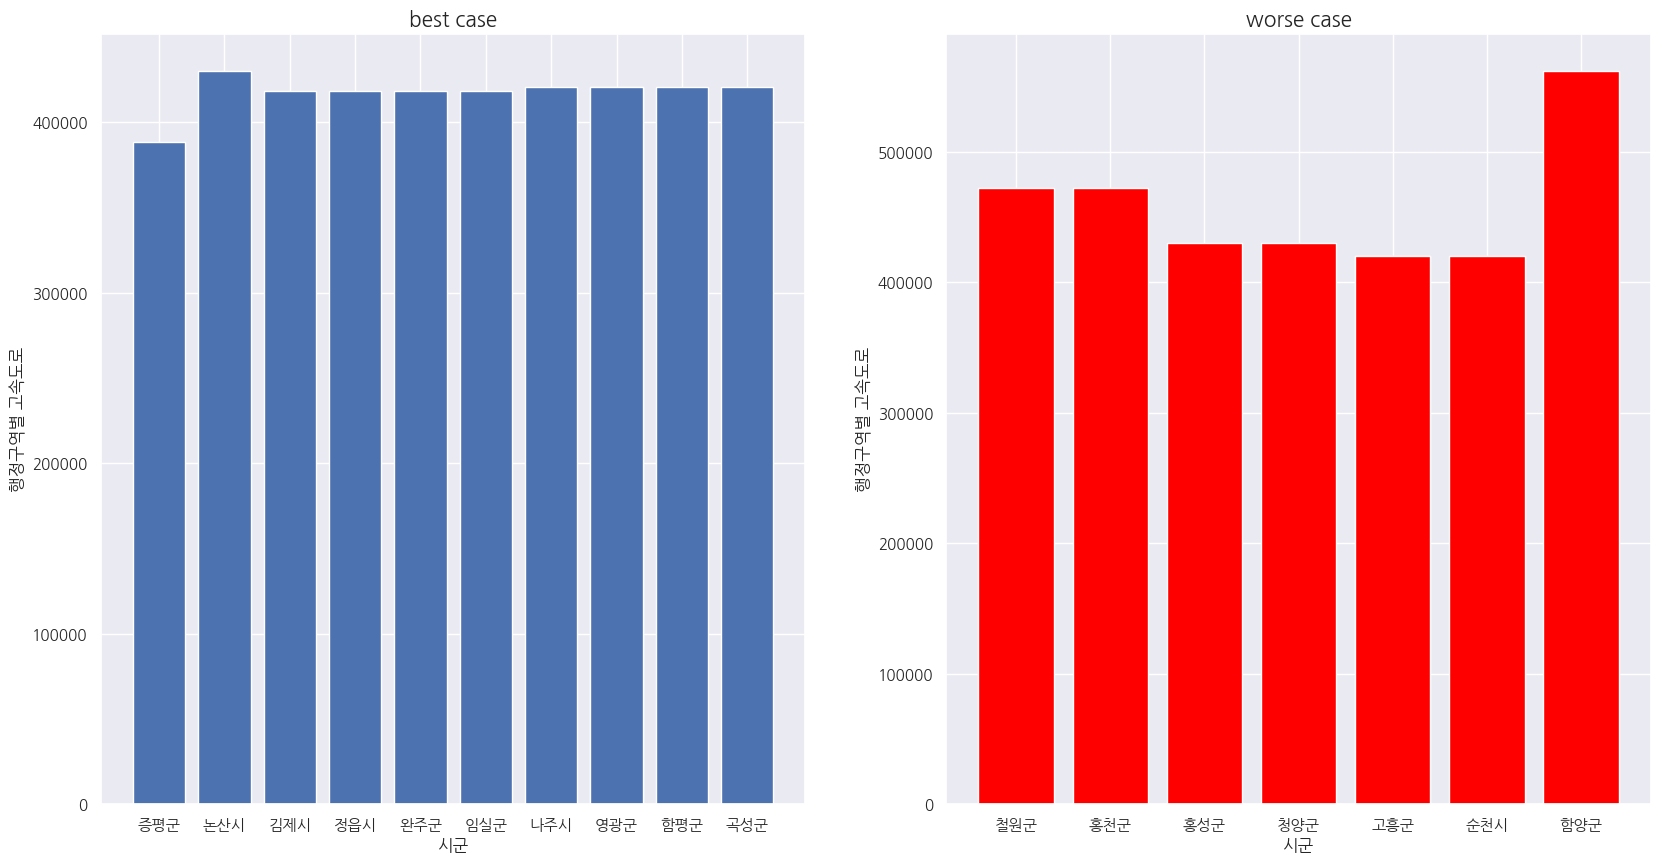

In [139]:
#best case와 worse case를 비교
#x축은 시군, y축은 행정구역별 고속도로

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('best case',fontsize = 15)
plt.xlabel('시군')
plt.ylabel('행정구역별 고속도로')
plt.bar(best_case['시군'],best_case['행정구역 (도)별 고속도로 (m)'])

plt.subplot(1,2,2)
plt.title('worse case',fontsize = 15)
plt.xlabel('시군')
plt.ylabel('행정구역별 고속도로')
plt.bar(worse_case['시군'],worse_case['행정구역 (도)별 고속도로 (m)'], color='red')

plt.show()

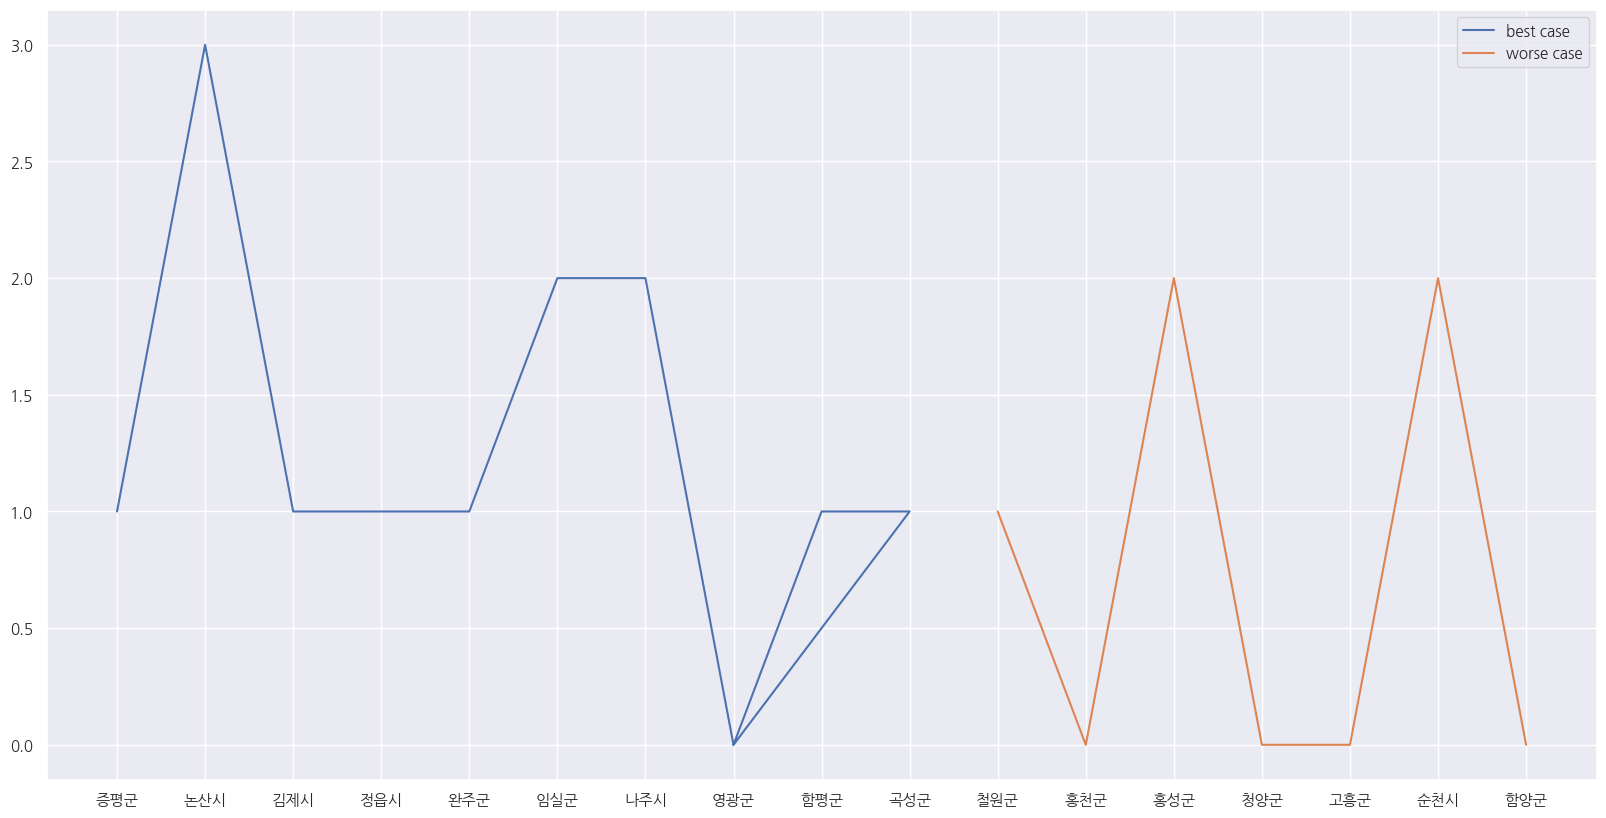

In [138]:
#best case와 worse case를 비교
#x축은 시군, y축은 시군 철도 역 개수
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('best case',fontsize = 15)
plt.xlabel('시군')
plt.ylabel('시군 철도 역 개수')
plt.plot(best_case['시군'],best_case['시군 철도 역 개수'])

plt.subplot(1,2,2)
plt.title('worse case',fontsize = 15)
plt.xlabel('시군')
plt.ylabel('시군 철도 역 개수')
plt.plot(worse_case['시군'],worse_case['시군 철도 역 개수'], color='red')

plt.show()

In [146]:
result = pd.DataFrame(data=dict(good=best_case.mean(axis=0), bad=worse_case.mean(axis=0)))
result = result.round(2)
result

/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/294133473.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  result = pd.DataFrame(data=dict(good=best_case.mean(axis=0), bad=worse_case.mean(axis=0)))
/var/folders/d4/tprmj9kx0x5cnsmdyn8_sqzw0000gn/T/ipykernel_4777/294133473.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  result = pd.DataFrame(data=dict(good=best_case.mean(axis=0), bad=worse_case.mean(axis=0)))


,good,bad
지정면적(천제곱미터),218.09,175.38
관리면적(천제곱미터),217.55,174.50
행정구역 (도)별 고속도로 (m),417684.18,453428.75
시군 철도 역 개수,1.18,0.62
시군 농공단지 개수,5.64,4.88


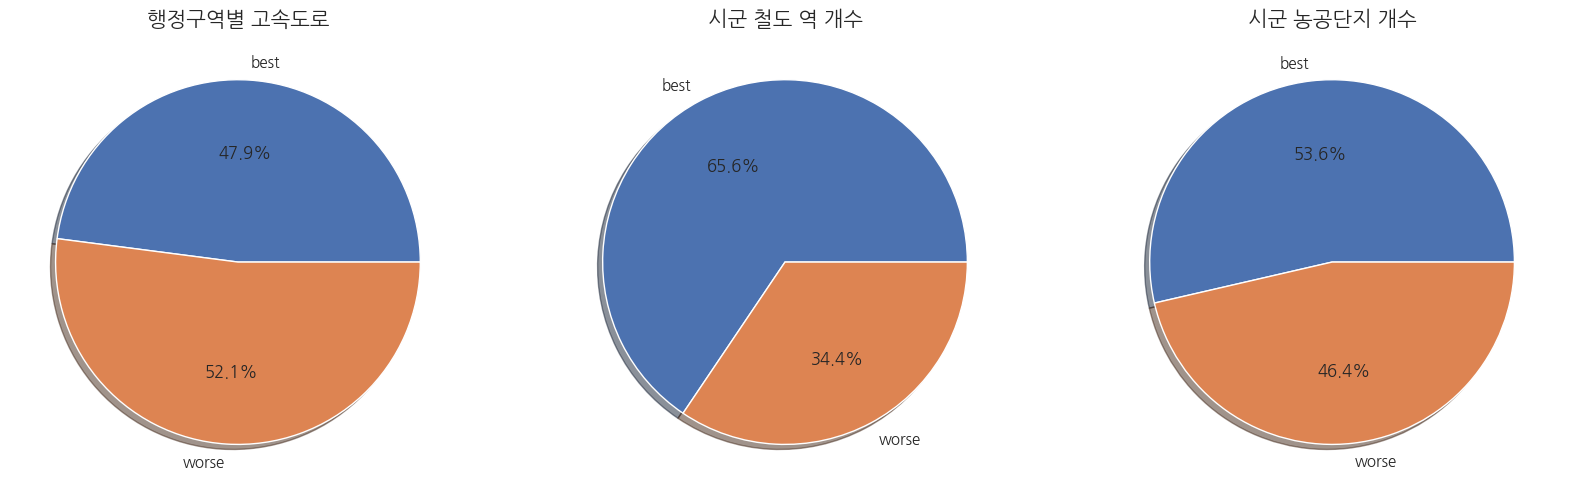

In [150]:
#result의 각 결과값 subplot으로 시각화
#원형 그래프 5개
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('행정구역별 고속도로',fontsize = 15)
plt.pie((result['good'][2],result['bad'][2]), labels=['best','worse'], autopct='%.1f%%', shadow=True)    

plt.subplot(1,3,2)
plt.title('시군 철도 역 개수',fontsize = 15)
plt.pie((result['good'][3],result['bad'][3]), labels=['best','worse'], autopct='%.1f%%', shadow=True)

plt.subplot(1,3,3)
plt.title('시군 농공단지 개수',fontsize = 15)
plt.pie((result['good'][4],result['bad'][4]), labels=['best','worse'], autopct='%.1f%%', shadow=True)

plt.show()
